<center>
    <h2><b> Análise de dados utilizando <i>Natural language processing</i> (NLP)</b></h2>
    <h3>Desafio 03 - Quero Ser Data</b></h3>
    ✦ <i>Gabriel Pandolfi, Naiara da Gama e Thaís Marins</i> ✦
</center>

______________________________________________________________________________________________________________________________________________________

**Orientações:**
* Fazer um relatório de até 3 páginas da base "avaliações_am.txt"

* Enviar o relatório por e-mail para bidsilva@rd.com.br

* Podem usar o Excel e Python

* O relatório deve ser enviado até 04/10/2023 às 11:59

* O nome do relatório deve ser: relatório_desafio_03_grupo_02.pdf

**Perguntas Guias:**

* Quais paralavras mais frequentes?
* Existem tipos ou classificações de avaliações?
* Existem frequências de palavras diferentes para tipos diferentes de avaliações?
* Conseguimos tirar alguma conclusão de um histograma?
* Conseguimos tirar alfuma conclusõa de uma nuvem de palavras?
* O que mais poderíamos fazer?
* Quais conclusões posso tirar dessas avaliações?

______________________________________________________________________________________________________________________________________________________

In [ ]:
#Montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importação de bibliotecas utilizadas:

In [ ]:
#Instalação de biblioteca para identificar o idioma
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=6430999c96245a2f96131ec869676c3876f83055d0de36f704986d17b6a0449f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# usaremos o regex para limpar o texto
import re

#biblioteca para identificar os idiomas
from langdetect import detect

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Caminho para a base de dados
caminho = "/content/drive/MyDrive/Grupo RD/Desafio 03 - NLP/avaliacoes_am.txt"
caminho

'/content/drive/MyDrive/Grupo RD/Desafio 03 - NLP/avaliacoes_am.txt'

In [ ]:
#Abrindo o arquivo .txt
with open(caminho, encoding="utf8") as arquivo:
    avaliacoes = arquivo.read()
    print(avaliacoes)

Avaliações
"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregame

In [ ]:
# dividindo a string em uma lista das avaliações e utilizando o ";" como separador das avaliações
lista_avaliacoes = avaliacoes.split(';')
lista_avaliacoes

['Avaliações\n"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carreg

In [ ]:
#Excluindo a ultima avaliação que é apenas uma quebra de linha \n
lista_avaliacoes.pop()
lista_avaliacoes

['Avaliações\n"""Com a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carreg

In [ ]:
#Quantidade de avaliações
len(lista_avaliacoes)

10042

In [ ]:
#Avaliação antes do pré-processamento
lista_avaliacoes[22]

'"""\n"""Fico sempre com o pé atrás quando vou comprar produtos da Xiaomi sem ser na loja oficial pois já existem muitas imitações no mercado. Porém já é o segundo celular que compro do vendedor (GREAT DEAL OFFICIAL) e os dois são originais, inclusive verifiquei o IMEI no site oficial da XIAOMI e os dois foram aprovados.'

______________________________________________________________________________________________________________________________________________________

## **Pré-processamento do texto utilizando *regex***

In [ ]:
def pre_processamento(texto):
    texto_sem_aspas = re.sub(r'^"\n"|^"+|\n"+', '', texto)

    return texto_sem_aspas

In [ ]:
#Avaliação depois do pré-processamento
pre_processamento(lista_avaliacoes[22])

'Fico sempre com o pé atrás quando vou comprar produtos da Xiaomi sem ser na loja oficial pois já existem muitas imitações no mercado. Porém já é o segundo celular que compro do vendedor (GREAT DEAL OFFICIAL) e os dois são originais, inclusive verifiquei o IMEI no site oficial da XIAOMI e os dois foram aprovados.'

In [ ]:
#Salvando as avaliações pré-processadas
%%time
avaliacoes_pp = [pre_processamento(texto_lista) for texto_lista in lista_avaliacoes]
avaliacoes_pp

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 157 ms


['AvaliaçõesCom a necessidade de comprar um celular custo benefício comecei pesquisando os modelos que mais vendem no mercado e me deparei com os líderes de sempre: Samsung, Motorola...Apple não é custo-benefício aqui no Brasil.Eu já tive smartphones dessas marcas supracitadas, mas nunca da Xiaomi.Por conseguinte, analisei vários vídeos e tinham varias opções (não cabem ser citadas agora) que entregavam uma boa qualidade de apenas algumas características, porém o conjunto completo deixava sempre a desejar.Partindo da premissa que eu saí de um celular no seguinte estado:-Marca: Samsung-Modelo: Gran prime-Ano de lançamento: 2015-Armazenamento: apenas 8gb de memória interna.Considerando também o valor do mercado atual dos Smartphones: CATASTRÓFICO.Associo que a escolha da marca condiz com o meu objetivo:- Precisava de uma boa tela ( essa tela é a melhor do mercado para esses celulares de entrada).- Tinha a necessidade de uma boa bateria ( essa faz jus à marca, sem contar com o carregament

______________________________________________________________________________________________________________________________________________________

### **Métricas Estatísticas**

In [ ]:
#Quantidade de avaliações pré-processadas
total_av = len(avaliacoes_pp)
print(f"A quantidade de avaliações pré-processadas na base de dados fornecida é: {total_av}\n")
#len(avaliacoes_pp[31])
#print(avaliacoes_pp[31])

A quantidade de avaliações pré-processadas na base de dados fornecida é: 10042



In [ ]:
#Qual a maior avaliação presente na base de dados
max_av = max([len(texto) for texto in avaliacoes_pp])
print(f"Número de caracteres da maior avaliação: {max_av}")
#max(avaliacoes_pp)
#min(avaliacoes_pp)

Número de caracteres da maior avaliação: 9134


'  se  o  cômodo  for  pequeno ,  consegue dar  um  clima  agradável,  mas  não  é  gelado , como  um  ar condicionado,  fica  um  clima  agradável .'

In [ ]:
max_length = max([len(texto) for texto in avaliacoes_pp])
indice_max = [i for i, texto in enumerate(avaliacoes_pp) if len(texto) == max_length]
for i in indice_max:
  print("Maior avaliação (por número de caracteres):", avaliacoes_pp[i])

Maior avaliação (por número de caracteres): Impressions after 1 week. May update if something goes wrong later, otherwise see you in a few years.----------------------------------------------------------------------My hands measure 18 x 10 cm and I use a palm grip. Length is measured from tip of middle finger to base of palm, and width is measured from edge of pinky to edge of thumb when all fingers are placed together.I've mained 4 mice over the years, including this one. M65 RGB, M65 RGB Elite, Razer Basilisk x Hyperspeed, and this Corsair Nightsword. The original M65 RGB was a real tank that lasted me 5+ years of hard usage. The switches are still 100% responsive, but I ruined the surface coat with acetone so I upgraded to the Elite. The M65 Elite started losing responsiveness in the left click after 4 months. The Basilisk x Hyperspeed was meant to be my wireless mouse while commuting. It felt decently comfortable in store and the shape was very well done except for a slightly-off h

In [ ]:
#Qual a menor avaliação presente na base de dados
min_av = min([len(texto) for texto in avaliacoes_pp])
print(f"Número de caracteres da menor avaliação: {min_av}")


Número de caracteres da menor avaliação: 1


In [ ]:
count = 0
min_length = min([len(texto) for texto in avaliacoes_pp])
indice_min = [i for i, texto in enumerate(avaliacoes_pp) if len(texto) == min_length]
for i in indice_min:
  print("Menor avaliação (por número de caracteres):", avaliacoes_pp[i])
  count +=1

print(count)

Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): É
Menor avaliação (por número de caracteres): 💕
Menor avaliação (por número de caracteres): f
Menor avaliação (por número de caracteres): (
Menor avaliação (por número de caracteres): 😍
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): 👍
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): D
Menor avaliação (por número de caracteres): .
Menor avaliação (por número de caracteres): …
15


In [ ]:
#Qual a média de caracteres por avaliação presente na base de dados
media_av = sum([len(texto) for texto in avaliacoes_pp])/len(avaliacoes_pp)
media_av = round(media_av, 2)
print(f"Número médio de caracteres nas avaliações: {media_av}")


Número médio de caracteres nas avaliações: 190.94


In [ ]:
#Comprimento mediano das avaliações:
mediana_av = sorted([len(texto) for texto in avaliacoes_pp])[len(avaliacoes_pp)//2]
print(f"Comprimento mediano das avaliações: {mediana_av}")

Comprimento mediano das avaliações: 86


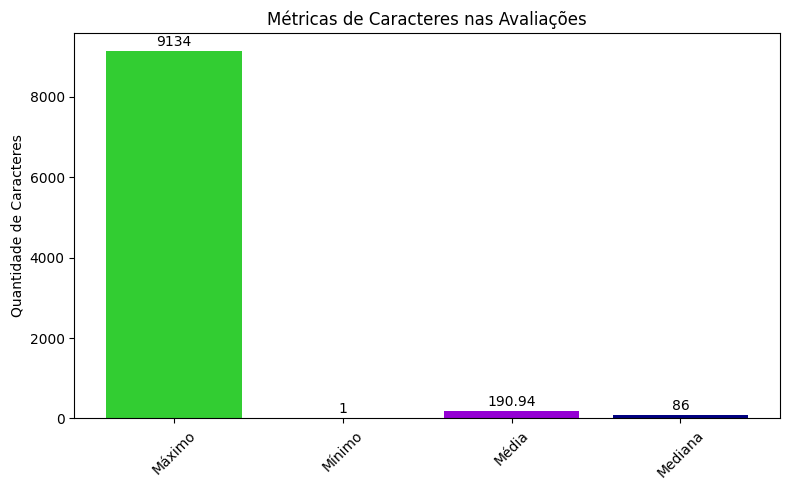

In [ ]:
# Listas com os nomes das métricas e seus valores correspondentes
metricas = ['Máximo', 'Mínimo', 'Média', 'Mediana']
valores = [max_av, min_av, media_av, mediana_av]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['limegreen', 'red', 'darkviolet', 'navy'])
plt.title('Métricas de Caracteres nas Avaliações')
plt.ylabel('Quantidade de Caracteres')
plt.xticks(rotation=45)

# Adicionar os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

______________________________________________________________________________________________________________________________________________________

### **NLP**

Para garantir que não há dados duplicados, transformamos todos as avaliações para minuscula e criamos um conjunto *set()* para garantir a unicidade das avaliações

In [ ]:
conjunto_avaliacoes = set(texto.lower() for texto in avaliacoes_pp)
len(conjunto_avaliacoes)

7797

In [ ]:
type(conjunto_avaliacoes)

set

In [ ]:
avaliacoes_sd = list(conjunto_avaliacoes)
type(avaliacoes_sd)

list

In [ ]:
len(avaliacoes_sd)

7797

## **Métricas sem duplicadas**

In [ ]:
#Qual a maior avaliação presente na base de dados
max_av_sd = max([len(texto) for texto in avaliacoes_sd])
print(f"Número de caracteres da maior avaliação: {max_av_sd}")

min_av_sd = min([len(texto) for texto in avaliacoes_sd])
print(f"Número de caracteres da menor avaliação: {min_av_sd}")

media_av_sd = sum([len(texto) for texto in avaliacoes_pp])/len(avaliacoes_sd)
media_av_sd = round(media_av, 2)
print(f"Número médio de caracteres nas avaliações: {media_av_sd}")

mediana_av_sd = sorted([len(texto) for texto in avaliacoes_sd])[len(avaliacoes_sd)//2]
print(f"Comprimento mediano das avaliações: {mediana_av_sd}")

Número de caracteres da maior avaliação: 9134
Número de caracteres da menor avaliação: 1
Número médio de caracteres nas avaliações: 190.94
Comprimento mediano das avaliações: 91


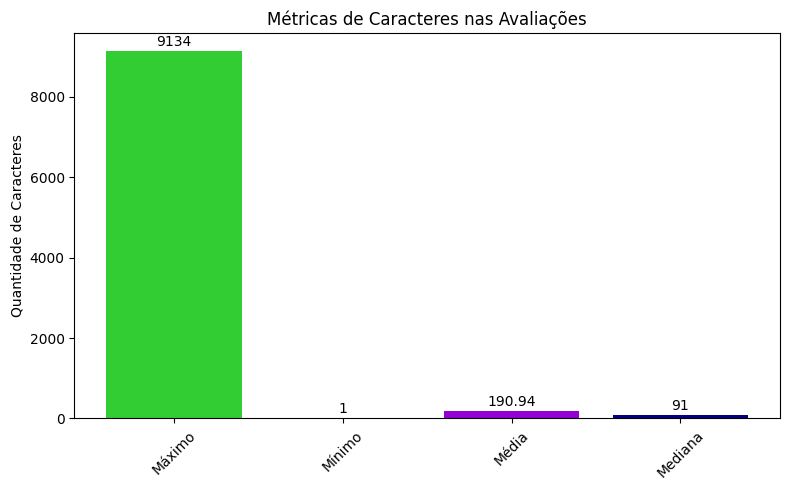

In [ ]:
# Listas com os nomes das métricas e seus valores correspondentes
metricas = ['Máximo', 'Mínimo', 'Média', 'Mediana']
valores = [max_av_sd, min_av_sd, media_av_sd, mediana_av_sd]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['limegreen', 'red', 'darkviolet', 'navy'])
plt.title('Métricas de Caracteres nas Avaliações')
plt.ylabel('Quantidade de Caracteres')
plt.xticks(rotation=45)

# Adicionar os valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Como foi observado, na base de dados há avaliações de diferentes idiomas. O objetivo do primeiro passo é compreender se o número de avaliações estrangeiras são significativas

In [ ]:
def detectar_idioma(texto):
  try:
    return detect(texto)
  except:
    return 'Desconhecido'

In [ ]:
idiomas = [detectar_idioma(avaliacao) for avaliacao in avaliacoes_sd]

In [ ]:
df = pd.DataFrame({'Avaliação': avaliacoes_sd, 'Idioma Detectado': idiomas})
df

Avaliação Idioma Detectado
0     o fone é muito bom, o volume é realmente bem a...               pt
1     a mídia não pôde ser carregada.\n             ...               pt
2     as camisetas são de algodão e são grossas, só ...               pt
3     o produto chegou com avarias, enviei de volta ...               pt
4                        tudo certo, produto excelente.               pt
...                                                 ...              ...
7792  macio, faz pouco barulho, veio com pilhas. é ó...               pt
7793  esse mouse cumpre o que promete, é bem sensíve...               pt
7794  ventila bem,  no entanto,  é muito ruim de ser...               pt
7795  preço compatível,uma alça parecia mal costurad...               pt
7796                      gostei do produto. top demais               pt

[7797 rows x 2 columns]

In [ ]:
#frequencia
idiomas_contagem = df['Idioma Detectado'].value_counts()
idiomas_contagem

pt              6971
en               310
es               153
it               152
sk                27
fr                26
ro                23
de                22
ca                20
hu                10
Desconhecido      10
ja                 9
sw                 6
so                 6
lt                 6
nl                 6
af                 4
tl                 4
lv                 4
sl                 4
id                 3
sq                 3
da                 2
sv                 2
no                 2
fi                 2
pl                 2
et                 2
hr                 2
cy                 2
tr                 1
vi                 1
Name: Idioma Detectado, dtype: int64

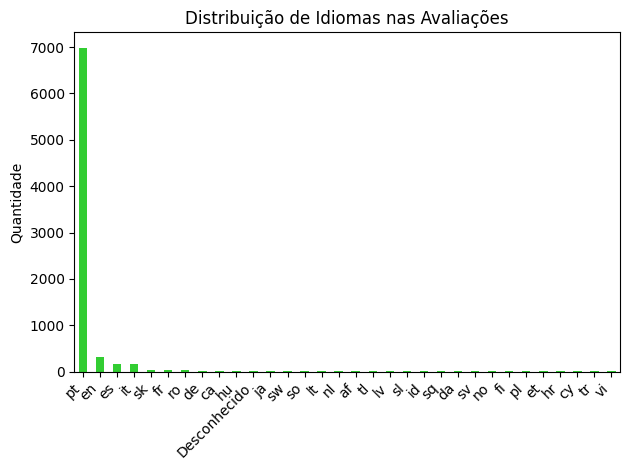

In [ ]:
idiomas_contagem = idiomas_contagem.sort_values(ascending=False)

idiomas_contagem.plot(kind='bar', color=['limegreen'])

plt.title('Distribuição de Idiomas nas Avaliações')
#plt.xlabel('Idiomas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Como foi observado a alta frequência de avaliações em Português. Optou-se por tratar os dados em dois grupos:**
 * Avaliações escritas em Português
 * Avaliações escritas em outro idioma

In [ ]:
idioma_pt = (df['Idioma Detectado'] == "pt").sum()
print(idioma_pt)

6971


In [ ]:
idioma_nao_pt = (df['Idioma Detectado'] != "pt").sum()
print(idioma_nao_pt)

826


In [ ]:
print(idioma_pt + idioma_nao_pt)

7797


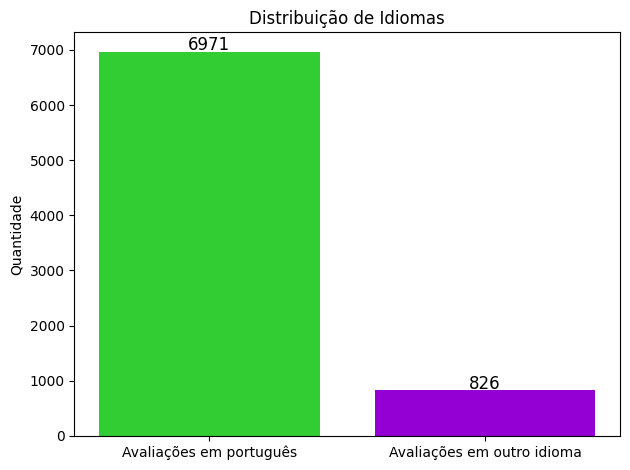

In [ ]:
plt.bar(['Avaliações em português', 'Avaliações em outro idioma'], [idioma_pt, idioma_nao_pt], color=['limegreen', 'darkviolet'])
plt.title('Distribuição de Idiomas')
plt.ylabel('Quantidade')

for i, v in enumerate([idioma_pt, idioma_nao_pt]):
    plt.text(i, v-50, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

O que vamos fazer a partir disso?

______________________________________________________________________________________________________________________________________________________

## Stopwords

In [ ]:
# fazendo o download das stopwords
nltk.download('stopwords')

# stopwords do portugues
stopwords_pt = stopwords.words('portuguese')
stopwords_pt.append('pra')
#stopwords_pt.remove('não')
stopwords_en = stopwords.words('english')
stopwords_es = stopwords.words('spanish')
stopwords_ge = stopwords.words('german')
stopwords_it = stopwords.words('italian')
print(stopwords_it)
#print('não' in stopwords_pt)

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
avaliacoes_pt = list(df.loc[df['Idioma Detectado'] == 'pt', 'Avaliação'])
print(avaliacoes_pt)


['o fone é muito bom, o volume é realmente bem alto, a bateria dura bastante, ainda não consegui usar até descarregar, mas já estou usando por 2 dias e até agora não descarregou nem a case. o fone é muito bonito, a case é pequena o que facilita levar pra qualquer lugar, o manual veio todo em português, tudo muito fácil de entender. a única coisa que reparei de negativo é que o toutch não é tão bom se tratando de passar ou voltar uma música, muitas vezes aperto 2 vezes para pular e ele apenas pausa a música, mas os outros fones que eu tive também tinham o mesmo problema então acredito que é normal. tirando esse detalhe o fone é maravilhoso, serviu perfeitamente para os meus objetivos, recomendo!', 'a mídia não pôde ser carregada.\n                \n\n\n\n\xa0atende razoavelmente em espaços pequenos, como meu escritorio.eu esperava que refrescasee um pouco mais.realmente, nao esfria, mas refresca o ambiente. meu escritorio esta, sim, com temperatura mais agradavel.', 'as camisetas são de

In [ ]:
avaliacoes_outro_idioma = list(df.loc[df['Idioma Detectado'] != 'pt', 'Avaliação'])
print(avaliacoes_outro_idioma)

['valeu super a pena , muito macio', 'entrega súper rápida,antes de lo esperadocalidad del producto,muy buena, resistentemuchos compartimentosmuy liviano,no pesa nadael color hermoso!! en la imagen parecía gris y es lila, precioso!!!me super encanto!!!', 'amei!!', 'ótimo custo benefício', 'here\'s a couple of photos i took on the first day without changing any settings. one is normal, one is with an added filter from an app.this is much better than the phone i\'ve been using. i have a goppro 8 black and this tg-6 is better in every regard except it\'s not quite as good with antishake and the focus makes a little whiring noise thats audible in playback. the video is much better than some footage i\'ve seen on youtube, so it\'s going to depend a lot on the settings, the camera person and the postprocessing.i bought this for photos. as far as picture quality, it seems to be as good or better than most phones, right out of the box. i feel like it keeps up with most cameras of higher cost a

In [ ]:
def remove_stopwords(texto, lista_stopwords):
    lista_palavras = texto.split()
    texto_em_lista_sem_stopwords = [palavra for palavra in lista_palavras if palavra.lower() not in lista_stopwords]
    texto_sem_stopwords = ' '.join(texto_em_lista_sem_stopwords)

    return texto_sem_stopwords

In [ ]:
avaliacoes_sd[22]

'ótima impressora, só a instalação que é trabalhosa. tive que reinstalar umas 3x para que entrasse corretamente na minha rede sem fio. fora isso a impressora é maravilhosa!! estou imprimindo em papel 13x19 polegadas (330x480 mm ou 1/4 da folha tamanho gráfico) e só tenho elogios! cores perfeitas, silenciosa, imprime rápido.'

In [ ]:
remove_stopwords(avaliacoes_sd[22], stopwords_pt)

'ótima impressora, instalação trabalhosa. reinstalar umas 3x entrasse corretamente rede fio. impressora maravilhosa!! imprimindo papel 13x19 polegadas (330x480 mm 1/4 folha tamanho gráfico) elogios! cores perfeitas, silenciosa, imprime rápido.'

In [ ]:
#Nuvem de palavras em português
avaliacoes_pt_sem_stopwords = [remove_stopwords(texto, stopwords_pt) for texto in avaliacoes_pt]
texto_word_cloud_pt = ' '.join(avaliacoes_pt_sem_stopwords)
wordcloud_pt = WordCloud(max_font_size=100, max_words=100, background_color="black", colormap="Greens",
                        scale=10, width=800, height=400).generate(texto_word_cloud_pt)



In [ ]:
todas_avaliacoes = ' '.join(avaliacoes_pt_sem_stopwords).lower()
todas_avaliacoes
avaliacoes_pt_sem_pontuacao = re.sub(r'[^\w\s]', '', todas_avaliacoes)
avaliacoes_pt_sem_pontuacao
palavras = avaliacoes_pt_sem_pontuacao.split()
palavras
contador = Counter(palavras)
contador

Counter({'fone': 237,
         'bom': 1474,
         'volume': 149,
         'realmente': 156,
         'bem': 1842,
         'alto': 139,
         'bateria': 462,
         'dura': 213,
         'bastante': 387,
         'ainda': 360,
         'consegui': 75,
         'usar': 404,
         'descarregar': 15,
         'usando': 145,
         '2': 183,
         'dias': 241,
         'agora': 189,
         'descarregou': 8,
         'case': 19,
         'bonito': 226,
         'pequena': 83,
         'facilita': 26,
         'levar': 59,
         'qualquer': 111,
         'lugar': 47,
         'manual': 89,
         'veio': 494,
         'todo': 112,
         'português': 21,
         'tudo': 392,
         'fácil': 428,
         'entender': 17,
         'única': 70,
         'coisa': 140,
         'reparei': 1,
         'negativo': 74,
         'toutch': 3,
         'tão': 179,
         'tratando': 6,
         'passar': 81,
         'voltar': 12,
         'música': 53,
         'muitas': 

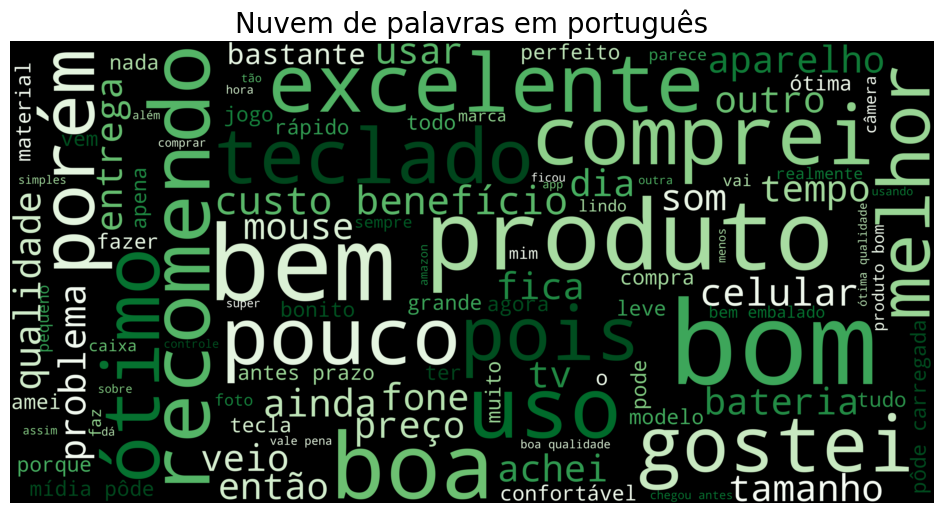

In [ ]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_pt, interpolation="bilinear")
plt.title('Nuvem de palavras em português', fontsize=20)
plt.axis("off")
plt.show()

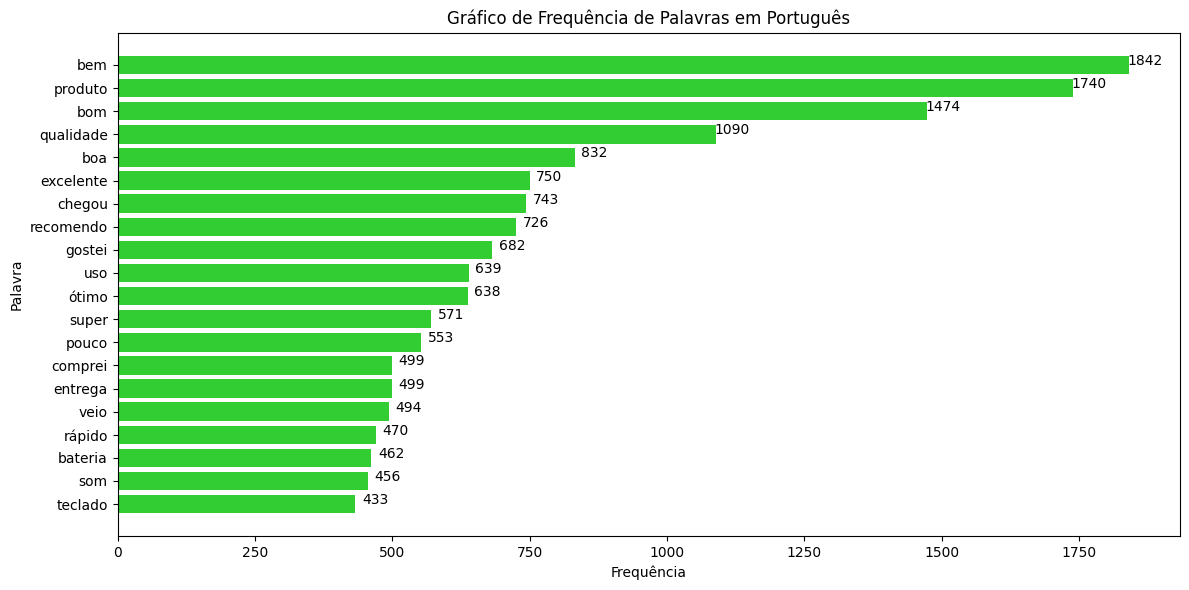

In [ ]:
# Grafico de palavras mais frequentes
#todas_palavras_pt = ' '.join(avaliacoes_pt_sem_stopwords).split()
#avaliacoes_pt_sem_pontuacao
todas_palavras_pt = palavras

frequencia_palavras_pt = Counter(todas_palavras_pt)
df_frequencia_palavras_pt = pd.DataFrame(frequencia_palavras_pt.most_common(20), columns=['Palavra', 'Frequência'])
df_frequencia_palavras_pt = df_frequencia_palavras_pt.sort_values(by='Frequência', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(df_frequencia_palavras_pt['Palavra'], df_frequencia_palavras_pt['Frequência'], color='limegreen')
plt.title('Gráfico de Frequência de Palavras em Português')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

for index, value in enumerate(df_frequencia_palavras_pt['Frequência']):
    plt.text(value+60, index, str(value), ha='right')

plt.tight_layout()
plt.show()


In [ ]:
df_frequencia_palavras_pt

Palavra  Frequência
19    teclado         433
18        som         456
17    bateria         462
16     rápido         470
15       veio         494
14    entrega         499
13    comprei         499
12      pouco         553
11      super         571
10      ótimo         638
9         uso         639
8      gostei         682
7   recomendo         726
6      chegou         743
5   excelente         750
4         boa         832
3   qualidade        1090
2         bom        1474
1     produto        1740
0         bem        1842

In [ ]:
#Nuvem de palavras para outro idioma
#avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, []) for texto in avaliacoes_outro_idioma]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_en) for texto in avaliacoes_outro_idioma]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_es) for texto in avaliacoes_outro_idioma_sem_stopwords]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_ge) for texto in avaliacoes_outro_idioma_sem_stopwords]
avaliacoes_outro_idioma_sem_stopwords = [remove_stopwords(texto, stopwords_it) for texto in avaliacoes_outro_idioma_sem_stopwords]
texto_word_cloud_outro_idioma = ' '.join(avaliacoes_outro_idioma_sem_stopwords)
wordcloud_outro_idioma = WordCloud(max_font_size=100, max_words=100, background_color="black", colormap="Purples",
                                   scale=10, width=800, height=400).generate(texto_word_cloud_outro_idioma)



In [ ]:
todas_avaliacoes = ' '.join(avaliacoes_outro_idioma_sem_stopwords).lower()
todas_avaliacoes
avaliacoes_outro_idioma_sem_pontuacao = re.sub(r'[^\w\s]', '', todas_avaliacoes)
avaliacoes_outro_idioma_sem_pontuacao
palavras_outro_idioma = avaliacoes_outro_idioma_sem_pontuacao.split()
palavras_outro_idioma
contador = Counter(palavras)
contador

Counter({'fone': 237,
         'bom': 1474,
         'volume': 149,
         'realmente': 156,
         'bem': 1842,
         'alto': 139,
         'bateria': 462,
         'dura': 213,
         'bastante': 387,
         'ainda': 360,
         'consegui': 75,
         'usar': 404,
         'descarregar': 15,
         'usando': 145,
         '2': 183,
         'dias': 241,
         'agora': 189,
         'descarregou': 8,
         'case': 19,
         'bonito': 226,
         'pequena': 83,
         'facilita': 26,
         'levar': 59,
         'qualquer': 111,
         'lugar': 47,
         'manual': 89,
         'veio': 494,
         'todo': 112,
         'português': 21,
         'tudo': 392,
         'fácil': 428,
         'entender': 17,
         'única': 70,
         'coisa': 140,
         'reparei': 1,
         'negativo': 74,
         'toutch': 3,
         'tão': 179,
         'tratando': 6,
         'passar': 81,
         'voltar': 12,
         'música': 53,
         'muitas': 

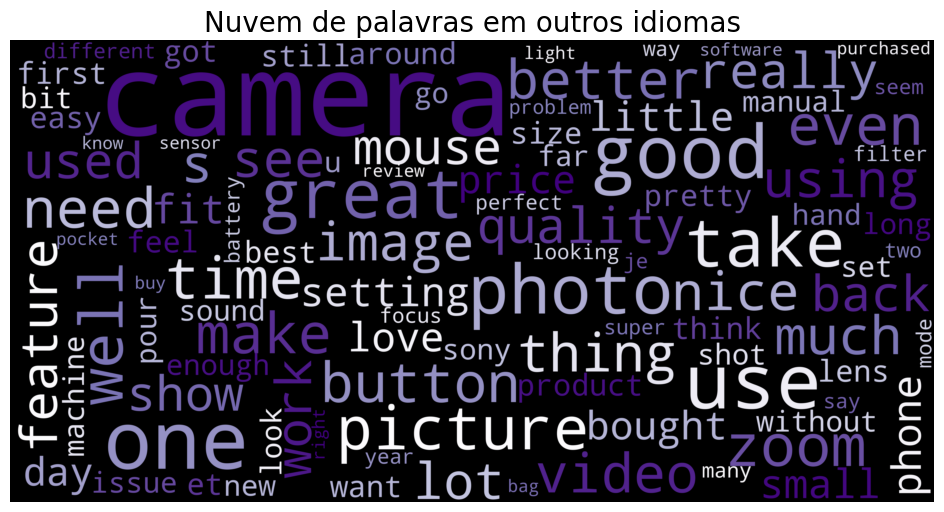

In [ ]:
# Plotar a nuvem de palavras para o outro idioma
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_outro_idioma, interpolation="bilinear")
plt.title('Nuvem de palavras em outros idiomas', fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
df_frequencia_palavras_outro_idioma

NameError: ignored

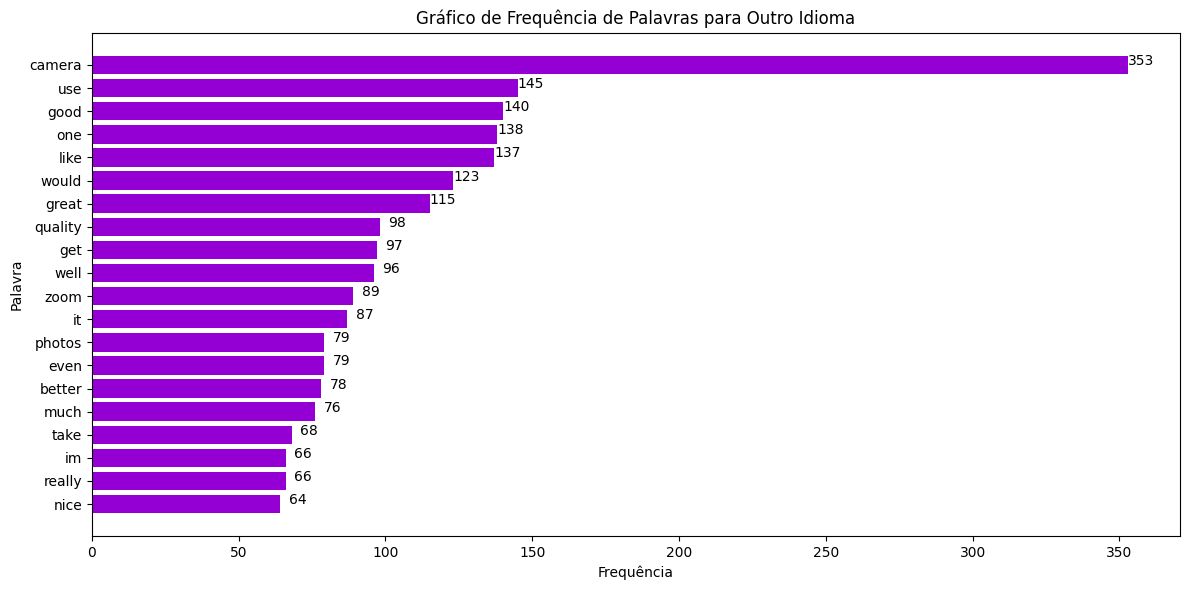

In [ ]:
# Grafico de palavras mais frequentes
todas_palavras_outro_idioma = ' '.join(avaliacoes_outro_idioma_sem_stopwords).split()
todas_palavras_outro_idioma =palavras_outro_idioma

frequencia_palavras_outro_idioma = Counter(todas_palavras_outro_idioma)
df_frequencia_palavras_outro_idioma = pd.DataFrame(frequencia_palavras_outro_idioma.most_common(20), columns=['Palavra', 'Frequência'])
df_frequencia_palavras_outro_idioma = df_frequencia_palavras_outro_idioma.sort_values(by='Frequência', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(df_frequencia_palavras_outro_idioma['Palavra'], df_frequencia_palavras_outro_idioma['Frequência'], color='darkviolet')
plt.title('Gráfico de Frequência de Palavras para Outro Idioma')
plt.xlabel('Frequência')
plt.ylabel('Palavra')

for index, value in enumerate(df_frequencia_palavras_outro_idioma['Frequência']):
    plt.text(value+9, index, str(value), ha='right')

plt.tight_layout()
plt.show()

In [ ]:
tamanhos = [len(avaliacao) for avaliacao in avaliacoes_sd_ss]

plt.hist(tamanhos, bins = 100, color='green', alpha=0.9)
plt.xlabel('Número de Palavras')
plt.ylabel('Número de Avaliações')
plt.title('Distribuição do Número de Palavras nas Avaliações')
plt.show()

NameError: ignored

### **Nuvem de Palavras**

In [ ]:
avaliacoes_pt = [avaliacao for avaliacao, idioma in zip(avaliacoes_sd, idiomas) if idioma == 'pt']
avaliacoes_nao_pt = [avaliacao for avaliacao, idioma in zip(avaliacoes_sd, idiomas) if idioma != 'pt']

In [ ]:
avaliacoes_pt = [remove_stopwords(avaliacao) for avaliacao in avaliacoes_pt]
avaliacoes_nao_pt = [remove_stopwords(avaliacao) for avaliacao in avaliacoes_nao_pt]

In [ ]:
%%time
texto_word_cloud = ' '.join(avaliacoes_sd_ss)
wordcloud = WordCloud(max_font_size = 100, max_words = 200, background_color = "black", colormap = "Greens",
                          scale = 10, width = 800, height = 400).generate(texto_word_cloud)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Suas avaliações em português e em outros idiomas
avaliacoes_pt = (df['Idioma Detectado'] == "pt")  # Preencha com as avaliações em português
avaliacoes_outro_idioma = (df['Idioma Detectado'] != "pt")  # Preencha com as avaliações em outro idioma

# Crie nuvem de palavras para português
avaliacoes_pt_sem_stopwords = [remove_stopwords(texto, stopwords.words('portuguese')) for texto in avaliacoes_pt]
texto_word_cloud_pt = ' '.join(avaliacoes_pt_sem_stopwords)
wordcloud_pt = WordCloud(max_font_size=100, max_words=200, background_color="black", colormap="Greens",
                        scale=10, width=800, height=400).generate(texto_word_cloud_pt)

# Crie nuvem de palavras para outro idioma (sem especificar stopwords)
texto_word_cloud_outro_idioma = ' '.join(avaliacoes_outro_idioma)
wordcloud_outro_idioma = WordCloud(max_font_size=100, max_words=200, background_color="black", colormap="Blues",
                                   scale=10, width=800, height=400).generate(texto_word_cloud_outro_idioma)

# Plotar as nuvens de palavras
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pt, interpolation="bilinear")
plt.title('Nuvem de Palavras para Português')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_outro_idioma, interpolation="bilinear")
plt.title('Nuvem de Palavras para Outro Idioma')
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download("punkt")
nltk.download("stopwords")

# Função para calcular a similaridade de cosseno entre duas strings
def cosine_similarity_score(text1, text2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

# Função para verificar se duas strings são duplicadas com base na similaridade de cosseno
def are_strings_duplicates(text1, text2, threshold=0.8):
    # Tokenização e remoção de stopwords
    stop_words = set(stopwords.words("english"))
    tokens1 = [word.lower() for word in word_tokenize(text1) if word.isalnum() and word.lower() not in stop_words]
    tokens2 = [word.lower() for word in word_tokenize(text2) if word.isalnum() and word.lower() not in stop_words]

    # Reconstroi as strings após a tokenização
    text1 = " ".join(tokens1)
    text2 = " ".join(tokens2)

    similarity_score = cosine_similarity_score(text1, text2)

    return similarity_score >= threshold

# Exemplo de uso
text1 = "Esta é uma avaliação de produto muito boa."
text2 = "A avaliação deste produto é excelente."

if are_strings_duplicates(text1, text2):
    print("As strings são duplicadas.")
else:
    print("As strings não são duplicadas.")
